<a href="https://colab.research.google.com/github/materam/Chitoo/blob/master/%F0%9F%98%B6%E2%80%8D%F0%9F%8C%AB%EF%B8%8F%F0%9F%99%87%F0%9F%8F%BB%E2%80%8D%E2%99%80%EF%B8%8F_Stress_Level_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jeyasrisenthil_input_data_path = kagglehub.dataset_download('jeyasrisenthil/input-data')

print('Data source import complete.')


100%|██████████| 13.9k/13.9k [00:00<00:00, 11.2MB/s]

Extracting files...
Data source import complete.


# ***STRESS LYSIS***

***ABOUT THE DATA & THE NOTEBOOK***

**Based on the human’s physical activity, the stress levels of the human being are detected and analyzed. A dataset of 2001 samples is provided for human body humidity, body temperature and the number of steps taken by the user. Three different classifications of stress are analyzed such as low stress, normal stress, and high stress.**

**In this notebook, I've analyzed the features of the dataset, trained the model and finally deployed it too.**

**HIT THE UPVOTE 🔼**

In [2]:
# File - Stress_Lysis.ipynb

# ***IMPORTS***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# ***DATA COLLECTION***

* ***Reading the Data Files***

In [11]:
from google.colab import files
uploaded = files.upload()


Saving Stress-Lysis.csv to Stress-Lysis.csv


In [12]:
import pandas as pd

data = pd.read_csv('Stress-Lysis.csv')
data.head()


,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [9]:
data=pd.read_csv('/kaggle/input/input-data/Stress-Lysis.csv')
data.head()  # displays the first five rows of the dataframe

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/input-data/Stress-Lysis.csv'

# ***ANALYZING THE DATA***

In [13]:
data.shape  # returns a tuple of array dimension that specifies the number of rows and columns

(2001, 4)

In [14]:
data.info()  # prints the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [15]:
data.describe()  # returns the statistical summary of the data

,Humidity,Temperature,Step_count,Stress_Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


# ***DATA CLEANING***

***STEPS:***

***1. Analyze the numerical and categorical features, and convert categorical feature into numerical.***

Stress Level
0 - Low stress
1 - Normal stress
2 - High Stress

In [16]:
data['Stress_Level'].unique()

array([1, 2, 0])

***2. Check for missing values and handle them.***

In [17]:
data.isnull().sum()

,0
Humidity,0
Temperature,0
Step_count,0
Stress_Level,0


***3.Check for duplicate values***

In [18]:
data.duplicated().sum()

np.int64(0)

# ***EDA - EXPLORATORY DATA ANALYSIS***

***1.Univariate Non-Graphical***

***Check for outliers. If present try to handle them.***

In [19]:
data.skew()

,0
Humidity,1.179993e-18
Temperature,-1.297993e-17
Step_count,-6.998237e-03
Stress_Level,-1.811032e-01


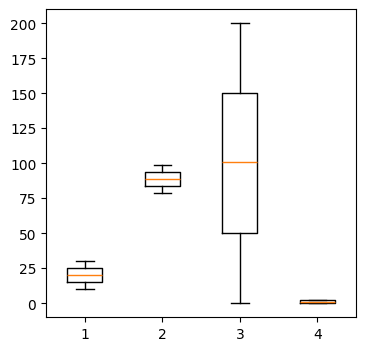

In [20]:
plt.figure(figsize=(4,4))
plt.boxplot(data)
plt.show()

All 4 columns consists skewness.

***Skewness Reduction***

In [21]:
# Logarithmic Transformation
hum_log = np.log(data['Humidity'])
h = round(hum_log.skew(),10)
print(h)

-0.3790364332


In [22]:
# SquareRoot Transformation
temp_sqrt = np.sqrt(data['Temperature'])
temp_sqrt.skew()
t = round(temp_sqrt.skew(),10)
print(t)

-0.0390881104


In [23]:
quantile1=data["Step_count"].quantile(0.25)
quantile2=data["Step_count"].quantile(0.75)

In [24]:
quantile1

np.float64(50.0)

In [25]:
quantile2

np.float64(150.0)

In [26]:
data["Step_count"]=np.where(data["Step_count"]<quantile1,quantile1,data["Step_count"])
data["Step_count"]=np.where(data["Step_count"]>quantile2,quantile2,data["Step_count"])

In [27]:
s = round(data['Step_count'].skew(),10)
print(s)

-0.0094975784


In [28]:
# SquareRoot Transformation
stress_sqrt = np.sqrt(data['Stress_Level'])
sl = round(stress_sqrt.skew(),10)
print(sl)

-0.7944935599


***2.Univariate Graphical***

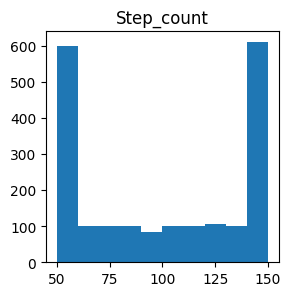

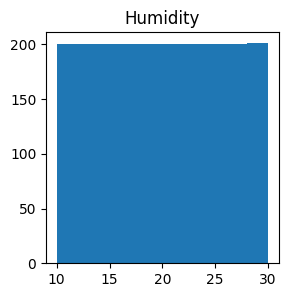

In [29]:
column=['Step_count','Humidity']
for category in column:
    plt.figure(figsize=(3,3))
    plt.hist(data[category])
    plt.title(category)
    plt.show()

<Axes: xlabel='Stress_Level', ylabel='Count'>

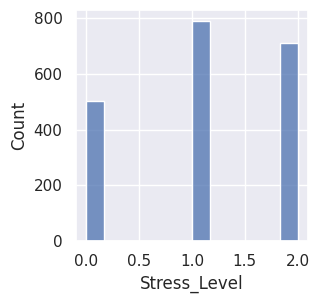

In [30]:
# histplot (categorical)
plt.figure(figsize=(3,3))
sns.set(font_scale=1)
sns.histplot(data=data, x='Stress_Level')

<Axes: ylabel='Temperature'>

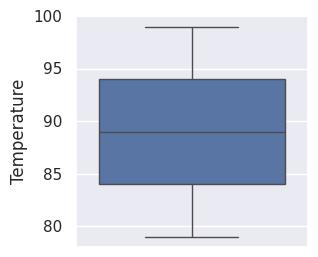

In [31]:
plt.figure(figsize=(3,3))
sns.boxplot(data['Temperature'])

***3.Multivariate Non-Graphical***

***Correlation***

In [32]:
correlation = data.corr()
correlation

,Humidity,Temperature,Step_count,Stress_Level
Humidity,1.000000,1.000000,0.902053,0.936036
Temperature,1.000000,1.000000,0.902053,0.936036
Step_count,0.902053,0.902053,1.000000,0.859096
Stress_Level,0.936036,0.936036,0.859096,1.000000


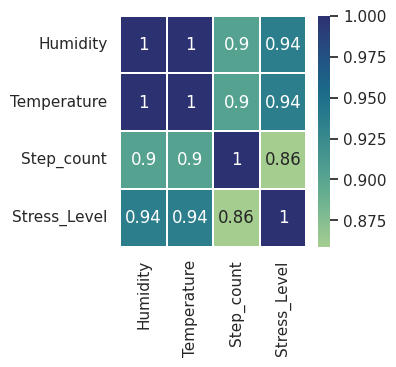

In [33]:
plt.figure(figsize=(3,3))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

***4.Multivariate Graphical***

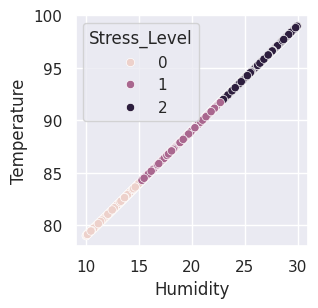

In [34]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='Humidity',y='Temperature',hue='Stress_Level',data=data)
plt.show()

# ***MODELLING***

In [35]:
from sklearn.model_selection import train_test_split
X=data.drop(['Stress_Level'],axis=1)
y=data['Stress_Level']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

***LOGISTIC REGRESSION***

In [36]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(C=1.0,random_state=2)
regressor.fit(X_train,y_train)

LogisticRegression(random_state=2)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix
prediction = regressor.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print(confusionmatrix)

[[ 83   0   0]
 [  0 166   0]
 [  0   1 151]]


In [38]:
print(accuracy_score(y_test,prediction))

0.9975062344139651


***RANDOM FOREST CLASSIFICATION***

In [39]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
model.fit(X,y)
prediction = model.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print(confusionmatrix)

[[ 83   0   0]
 [  0 166   0]
 [  0   0 152]]


In [40]:
print(accuracy_score(y_test,prediction))

1.0


***SUPPORT VECTOR MACHINE***

In [45]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.transform(X_test)


In [46]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [47]:
y_predict= classifier.predict(X_test)
score=accuracy_score(y_test,y_predict)
print(score)

0.9950124688279302


# ***DEPLOYMENT***

***SAVING THE TRAINED MODEL***

In [48]:
import pickle

In [49]:
filename = 'stress_trained.sav'
pickle.dump(classifier,open(filename,'wb'))

***LOADING THE TRAINED MODEL***

In [50]:
loaded_model = pickle.load(open('stress_trained.sav','rb'))
# Download the stress_trained.sav model

In [51]:
# Evaluating

input_data = (11.05,80.05,14) #300
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")

input_data = (21.38,90.38,128) #100
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")

input_data = (25.41,94.41,167) #200
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")

[2]
Stress Level: HIGH
[2]
Stress Level: HIGH
[2]
Stress Level: HIGH


In [52]:
# File - Predictive System.py

# Imports
import numpy as np
import pickle

# Loading the trained model
loaded_model = pickle.load(open('stress_trained.sav','rb'))
# stress_trained.sav - replace the path of the file along with the file name
# Example: loaded_model = pickle.load(open('C:/Users/jeyasri/Downloads/PROJECT/stress_trained.sav','rb'))



input_data = (25.41,94.41,167) #200
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = loaded_model.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")

[2]
Stress Level: HIGH


In [53]:
# Trying to install streamlit
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


In [57]:
import numpy as np
import pickle
import streamlit as st

# Loading the trained model
loaded_model = pickle.load(open('stress_trained.sav','rb'))
# Replace path over stress_trained.sav

def stresslevel_prediction(input_data):

    #changing the input data into numpy array
    id_np_array = np.asarray(input_data)
    id_reshaped = id_np_array.reshape(1,-1)

    prediction = loaded_model.predict(id_reshaped)
    print(prediction)

    if(prediction[0]==0):
        return "Stress Level: LOW"
    elif(prediction[0]==1):
        return "Stress Level: MEDIUM"
    else:
        return "Stress Level: HIGH"

def main():

    st.title('STRESS LEVEL PREDICTION WEB APP')

    Humidity = st.text_input('Humidity Value')
    Temperature = st.text_input('Body Temperature')
    Step_count = st.text_input('Number of Steps')

    # Prediction code
    diagnosis = ''

    if st.button('PREDICT'):
        diagnosis = stresslevel_prediction([Humidity, Temperature, Step_count])

    st.success(diagnosis)

if __name__=='__main__':
    main()

2025-05-06 06:35:03.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 06:35:03.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 06:35:03.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 06:35:03.492 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 06:35:03.493 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 06:35:03.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 06:35:03.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 06:35:03.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Go to command prompt open the terminal and execute the command.**

streamlit run "path of the file.py"

Example: streamlit run "C:\Users\jeyasri\Downloads\PROJECT\Stress Level Prediction Web App.py"

**Your final result will be like this...**

# ![Stress.png](attachment:dacc60b2-6304-4afe-b1ca-1ed750052edd.png)